In [233]:
# Alexander P. Stuart: Coursera_Capstone_Course by IBM 

# Part 1: Web Scraping and Data Cleaning

### (import requests) grabs the contents from websites

In [19]:
import requests

### the variable (wiki_URL) = the URL of the webpage I am scraping

In [20]:
wiki_url = ('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

### headers distingusihes what type of browser is being used

In [21]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 Safari/537.36'}

### pull the content from (wiki_url) ; Headers determines the browser again

In [22]:
wiki_page = requests.get(wiki_url, headers=headers)

### run a print test to confirm it is working

In [23]:
print(wiki_page)

<Response [200]>


### import beautiful soup to begin cleaning the data

In [24]:
from bs4 import BeautifulSoup as BS

### tell beautiful soup where to begin looking for the date that needs to be collected for cleaning

In [25]:
soup = BS(wiki_page.content, 'html.parser')

### have beautiul soup print out the html source code so its easier to source

In [26]:
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of postal codes of Canada: M - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":890001695,"wgRevisionId":890001695,"wgArticleId":539066,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Communications in Ontario","Postal codes in Canada","Toronto","Ontario-related lists"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""]

### in the source code above the table begins with < table class='wikitable sortable'> < tbody>.  Use beautifulsoup to extract the tables body.  

In [27]:
table = soup.find('table',{'class':'wikitable sortable'}).tbody

### in the source code above < tr> is table row.  extract all the table rows with the table created above using beautiful soup

In [28]:
rows = table.find_all('tr')

### print the rows that were extracted above

In [29]:
print(rows)

[<tr>
<th>Postcode</th>
<th>Borough</th>
<th>Neighbourhood
</th></tr>, <tr>
<td>M1A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>, <tr>
<td>M2A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>, <tr>
<td>M3A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>
</td></tr>, <tr>
<td>M4A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>
</td></tr>, <tr>
<td>M5A</td>
<td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
<td><a href="/wiki/Harbourfront_(Toronto)" title="Harbourfront (Toronto)">Harbourfront</a>
</td></tr>, <tr>
<td>M5A</td>
<td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
<td><a href="/wiki/Regent_Park" title="Regent Park">Regent Park</a>
</td></tr>, <tr>
<td>M6A</td>
<td><a href="/wiki/North_York" ti

### define the columns headers by extracting them.  replace possible line spaces (\n) with spaces('') for < th> (table header)

In [30]:
columns = [i.text.replace('\n','')
          for i in rows [0].find_all('th')]

### print the columns extracted above

In [31]:
print(columns)

['Postcode', 'Borough', 'Neighbourhood']


### import pandas to begin styling the visual charts

In [32]:
import pandas as pd

### convert the columns to the pd dataframe

In [33]:
df = pd.DataFrame(columns=columns)

### display the pandas dataframe

In [34]:
display(df)

,Postcode,Borough,Neighbourhood


### extract every row of < td> (table data) that corrosponds to the 3 columns.  appends the values to the pandas dataframe.  skip the first row because its a header.

In [35]:
for i in range(1, len(rows)):
    tds = rows[i].find_all('td')
    
    if len(tds)==4:
        values=[tds[0].text, tds[1].text, tds[2].text, tds[3].text.replace('\n',''.replace('\xa0',''))]
    else:
        values=[td.text.replace('\n', '').replace('\xa0','') for td in tds]
        
        df=df.append(pd.Series(values, index=columns),ignore_index=True)

### display the table created 

In [36]:
display(df)

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned


### print the number of (rows, columns)

In [37]:
print(df.shape)

(288, 3)


### determine how man boroughs are unassigned

In [38]:
(df['Borough']=='Not assigned').sum()

77

### save content of df before manipulating

In [39]:
dff=df

### get rid of unassigned boroughs

In [40]:
df_na=dff[dff.Borough !='Not assigned']
df_na.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


### display the (rows, columns) now that not assigned (na) is dropped

In [41]:
df_na.shape

(211, 3)

### display the unassigned neighborhoods that have a borough

In [42]:
(df_na['Neighbourhood']== 'Not assigned').sum()

1

### import numpy to replace unassigned neighborhood name with borough name

In [43]:
import numpy as np

### replace the neighborhood with borough name

In [44]:
df_na['Neighbourhood'] = np.where(df_na['Neighbourhood'] == 'Not assigned', df_na['Borough'], df_na['Neighbourhood'])

C:\Users\Alexander Stuart\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### display rows and colums again

In [45]:
df_na.shape

(211, 3)

### display top 5 rows on the current table status

In [46]:
display(df_na.head(5))

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


### print the "type" of data frame I am working on 

In [47]:
type(df_na)

pandas.core.frame.DataFrame

### determine where 1+ neighborhoods exist in one postal code.  Combine the rows of the neighborhood into postcode and corresponding borough.  the corresponding will be seperated with commas.

In [48]:
df_ca=df_na.groupby(['Postcode','Borough'])['Neighbourhood'].apply(', '.join).reset_index()
df_ca.columns=['Postcode', 'Borough', 'Neighbourhood']

### display the new current version of the table 

In [49]:
display(df_ca.head(11))

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


### rename df_ca as df_toronto

In [50]:
df_toronto=df_ca

### print the type of dataframe being used

In [51]:
type(df_toronto)

pandas.core.frame.DataFrame

### df_toronto is the final dataframe for part 1

In [52]:
df_toronto.head(12)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


### convert the df to a csv file

In [53]:
df_toronto.to_csv('TorontoPostcodes.csv',index=False)

### show the merging postcodes for m5a verification

In [54]:
df_toronto.loc[df_toronto['Postcode']=='M5A']

,Postcode,Borough,Neighbourhood
53,M5A,Downtown Toronto,"Harbourfront, Regent Park"


### print the final dataframe rows and columns

In [55]:
print(df_toronto.shape)

(103, 3)


# Part 2: Geocoding

### install the geocoder using pip if it is not installed yet

In [56]:
!pip -q install geocoder

### import the geocoder so it can be used

In [57]:
import geocoder

### show the toronto dataframe's last 12 columns

In [58]:
df_toronto.tail(12)

,Postcode,Borough,Neighbourhood
91,M8Y,Etobicoke,"Humber Bay, King's Mill Park, Kingsway Park So..."
92,M8Z,Etobicoke,"Kingsway Park South West, Mimico NW, The Queen..."
93,M9A,Etobicoke,Islington Avenue
94,M9B,Etobicoke,"Cloverdale, Islington, Martin Grove, Princess ..."
95,M9C,Etobicoke,"Bloordale Gardens, Eringate, Markland Wood, Ol..."
96,M9L,North York,Humber Summit
97,M9M,North York,"Emery, Humberlea"
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv..."


### import the time library

In [59]:
import time

### start the timer

In [60]:
start=time.time()

### define the geocoder, find the lat and lng coordinates, define the area being defined, return the results

In [61]:
def get_latlng(arcgis_geocoder):
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords

### End the timer

In [62]:
end = time.time()

### print how long it took to run the data

In [63]:
print('Time of execution:',end - start)

Time of execution: 0.05300307273864746


### test a sample; try defining a single lat lng point for M5G

In [64]:
sample = get_latlng('M5G')

### test the sample

In [65]:
print(sample)

[43.65609081300005, -79.38492999999994]


### reverse the sample to find the address at coordinate location

In [66]:
gg = geocoder.geocodefarm(sample,method='reverse')

### print the results

In [67]:
print(gg)

<[OK] Geocodefarm - Reverse [100 Edward St, Toronto, ON M5G, Canada, Canada]>


### define postal_codes to the 'postcode' column of the Toronto dataframe.  define 'coordinates' to pull the lat and lng from every row associated with the postcode column.  Show how long it takes to run the data.

##### notice that it takes longer to run the larger dataframe than a smaller dataset.

In [68]:
import time
start = time.time()

postal_codes = df_toronto['Postcode']
coordinates = [get_latlng(postal_code) for postal_code in postal_codes.tolist()]

end = time.time()
print('Time of execution ', end - start, 'seconds')

Time of execution  68.59992361068726 seconds


### Define a new variable df_toronto_loc = to df_toronto

In [69]:
df_toronto_loc = df_toronto

### on df_toronto_coordiates use pandas to create lat and lng columns for the table

In [70]:
df_toronto_coordinates = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])

### Import the lat column to the previous existing table

In [71]:
df_toronto_loc['Latitude'] = df_toronto_coordinates['Latitude']

### Import lng to the previous existing table

In [72]:
df_toronto_loc['Longitude'] = df_toronto_coordinates['Longitude']

### convert the updated dataframe into a csv file

In [73]:
df_toronto_loc.to_csv('TorontoPostcodes.csv', index = False)

### display the dataframe as a table

In [74]:
display(df_toronto_loc.head(12))

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.811525,-79.195517
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.785730,-79.158750
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.765690,-79.175256
3,M1G,Scarborough,Woburn,43.768359,-79.217590
4,M1H,Scarborough,Cedarbrae,43.769688,-79.239440
5,M1J,Scarborough,Scarborough Village,43.743125,-79.231750
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.726245,-79.263670
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.713133,-79.285055
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.723575,-79.234976
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.696665,-79.260163


# Part 3: Clustering & Analysis

In [75]:
import folium

In [76]:
map = folium.Map(location=[43.6532,-79.3832], zoom_start=11)

for location in df_toronto_loc.itertuples(): #iterate each row of the dataframe
    label = 'Postal Code: {};  Borough: {};  Neighborhoods: {}'.format(location[1], location[2], location[3])
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(
        [location[-2], location[-1]],
        radius=1,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map) 
    folium.Circle(
        radius=500,
        popup=label,
        location=[location[-2], location[-1]],
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(map) 
    
map

In [90]:
import matplotlib.pyplot as plt

In [95]:
X = df_toronto_loc[['Longitude', 'Latitude']]

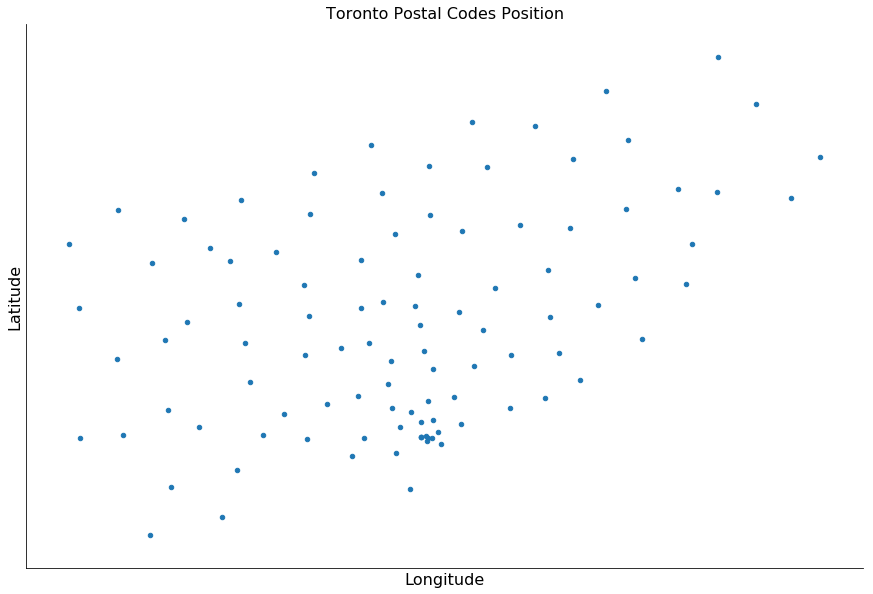

In [104]:
X = df_toronto_loc[['Longitude', 'Latitude']]

scatter_plot = X.plot.scatter(x='Longitude', 
               y='Latitude',  
               fontsize = 16,
               figsize=(15, 10))

scatter_plot.set_yticklabels([])
scatter_plot.set_xticklabels([])
scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
scatter_plot.spines['top'].set_color(None)
scatter_plot.spines['right'].set_color(None)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
scatter_plot.set_title('Toronto Postal Codes Position', fontsize=16)

scatter_plot.set_yticklabels(labels = 'Latitude', fontdict={'fontsize': 20})
plt.show()

In [109]:
import geopy

In [110]:
from geopy.distance import great_circle

#function to get the closest postcode pair and the distance using latitude and longitude
def closest_postcode(postcode, postcodes):
    postcode = np.asarray(postcode).reshape(1,-1)
    postcodes = np.asarray(postcodes)
    distances = [great_circle(postcode, point).meters for point in postcodes]
    closest_postcode_index = np.argmin(distances)
    return [round(distances[closest_postcode_index]), closest_postcode_index]

In [111]:

coordinates = df_toronto_loc[['Latitude', 'Longitude']]

distance, closest_point_index = closest_postcode(coordinates[:1], coordinates[~coordinates.index.isin([0])])
close_points = X[:1].append(X[closest_point_index+1:closest_point_index+2])
close_points

,Longitude,Latitude
0,-79.195517,43.811525
16,-79.216701,43.834215


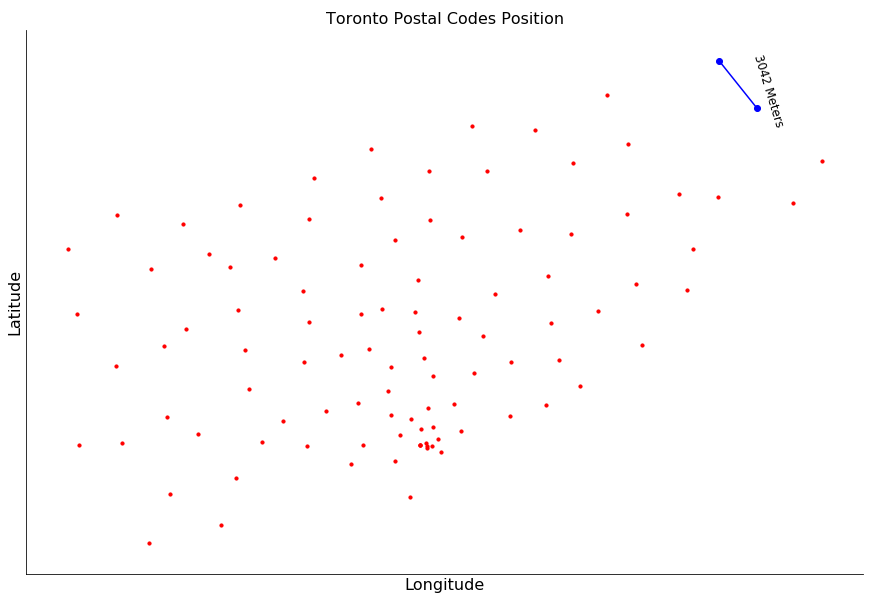

In [112]:
fig = plt.figure(figsize=(15,10))
scatter_plot = fig.add_subplot(111)
scatter_plot.scatter(X['Longitude'],X['Latitude'], s=10, c='r', marker="o")
scatter_plot.plot(close_points['Longitude'], close_points['Latitude'], c='b', marker="o")

# plt.legend(loc='upper left');
scatter_plot.annotate('{} Meters'.format(distance),
            xy=(.859, .912), xycoords='figure fraction',
            ha='left', va='top', rotation=-73,
            fontsize=12)

scatter_plot.set_yticklabels([])
scatter_plot.set_xticklabels([])
scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
scatter_plot.spines['top'].set_color(None)
scatter_plot.spines['right'].set_color(None)

plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Toronto Postal Codes Position', fontsize=16)

scatter_plot.set_yticklabels(labels = 'Latitude', fontdict={'fontsize': 20})
plt.show()

In [118]:
from math import isnan

for lat, lng, idx in zip(df_toronto_loc['Latitude'], df_toronto_loc['Longitude'], df_toronto_loc.index):
    distance, closest_point_index = closest_postcode([lat,lng], coordinates[~coordinates.index.isin([idx])])
    df_toronto_loc.at[idx,'Distance'] = np.int64(distance//2) #use the half of the disstance to avoid overlapping
    
df_toronto_loc.head(15)

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Distance
0,M1B,Scarborough,"Rouge, Malvern",43.811525,-79.195517,1521.0
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.785730,-79.158750,1296.0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.765690,-79.175256,1296.0
3,M1G,Scarborough,Woburn,43.768359,-79.217590,880.0
4,M1H,Scarborough,Cedarbrae,43.769688,-79.239440,880.0
5,M1J,Scarborough,Scarborough Village,43.743125,-79.231750,1094.0
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.726245,-79.263670,1127.0
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.713133,-79.285055,1118.0
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.723575,-79.234976,1094.0
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.696665,-79.260163,1356.0


In [119]:
map = folium.Map(location=[43.6532,-79.3832], zoom_start=11)

for location in df_toronto_loc.itertuples(): #iterate each row of the dataframe
    label = 'Postal Code: {};  Borough: {};  Neighborhoods: {}'.format(location[1], location[2], location[3])
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(
        [location[-3], location[-2]],
        radius=1,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map) 
    folium.Circle(
        radius=location[-1],
        popup=label,
        location=[location[-3], location[-2]],
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(map) 
    
map

In [120]:
CLIENT_ID = 'YZYGOCB5XFJ3ODAPA3RPIISQGOLI12U1WERZWGT2LGGROS2B' # your Foursquare ID
CLIENT_SECRET = 'CGETUXZ1VSWNZ11JWELWLYNQRSA0GUINTYIUDLMBVQHSVJTV' # your Foursquare Secret
VERSION = '20181102'

In [121]:

#function to format url
def format_url(lat, lng, radius=500, limit=100):
    return 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, 
        lat, lng, VERSION, radius, limit)

In [123]:
first_postcode = df_toronto_loc.iloc[2, :]
url = format_url(first_postcode['Latitude'], first_postcode['Longitude'], first_postcode['Distance'])

url

'https://api.foursquare.com/v2/venues/explore?client_id=YZYGOCB5XFJ3ODAPA3RPIISQGOLI12U1WERZWGT2LGGROS2B&client_secret=CGETUXZ1VSWNZ11JWELWLYNQRSA0GUINTYIUDLMBVQHSVJTV&ll=43.76569000000006,-79.17525603599995&v=20181102&radius=1296.0&limit=100'

In [173]:
#function to get batch of venues as a dataframe
def get_venues(url):
    results = requests.get(url).json()
    venues = results['response']['groups'][0]['items']
    return json_normalize(venues)

In [174]:
import json

In [175]:
import pandas.io.json

In [177]:
from pandas.io.json import json_normalize

In [178]:
venues_df = get_venues(url)
venues_df.head()

,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,...,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4bc366dab492d13a51b2a860-0,"[{'id': '4d4ae6fc7a7b7dea34424761', 'name': 'F...",4bc366dab492d13a51b2a860,4449 Kingston Road,CA,Scarborough,Canada,at Lawrence and Morningside,...,[4449 Kingston Road (at Lawrence and Morningsi...,"[{'label': 'display', 'lat': 43.76875171771289...",43.768752,-79.187982,M1E 2N7,ON,Chick-N-Joy,0,[],NaN
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4ba164fdf964a52039b337e3-1,"[{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...",4ba164fdf964a52039b337e3,4525 Kingston Rd,CA,West Hill,Canada,Morningside Crossing,...,"[4525 Kingston Rd (Morningside Crossing), West...","[{'label': 'display', 'lat': 43.77134173380578...",43.771342,-79.184341,NaN,ON,Bulk Barn,0,[],NaN
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4c9fdb04542b224bca4201a0-2,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",4c9fdb04542b224bca4201a0,4218 Lawrence Avenue East,CA,Scarborough,Canada,NaN,...,"[4218 Lawrence Avenue East, Scarborough ON M1E...","[{'label': 'display', 'lat': 43.76904597684398...",43.769046,-79.184386,M1E 4X9,ON,Little Caesars Pizza,0,[],NaN
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b3a9504f964a520646a25e3-3,"[{'id': '4bf58dd8d48988d186941735', 'name': 'L...",4b3a9504f964a520646a25e3,4525 Kingston Rd.,CA,Toronto,Canada,at Lawrence Ave. E,...,"[4525 Kingston Rd. (at Lawrence Ave. E), Toron...","[{'label': 'display', 'lat': 43.77146181777272...",43.771462,-79.184384,M1E 2P1,ON,LCBO,0,[],NaN
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4beca2f9d6e676b0538764d4-4,"[{'id': '52f2ab2ebcbc57f1066b8b41', 'name': 'S...",4beca2f9d6e676b0538764d4,"4525 Kingston Road, Unit #H8",CA,Scarborough,Canada,at Collinsgrove Rd.,...,"[4525 Kingston Road, Unit #H8 (at Collinsgrove...","[{'label': 'display', 'lat': 43.77066813, 'lng...",43.770668,-79.184150,M1E 2P1,ON,Booster Juice,0,[],NaN


In [179]:
#function to clean the venues dataframe
def clean_df(df):
    relevant_columns = ['venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.name']
    clean_df = df.loc[:,relevant_columns]

    #rename columns
    clean_df.columns = ['Category', 'Lat', 'Lng', 'Name']
    return clean_df 

venues_df = clean_df(venues_df)
venues_df.head()

,Category,Lat,Lng,Name
0,"[{'id': '4d4ae6fc7a7b7dea34424761', 'name': 'F...",43.768752,-79.187982,Chick-N-Joy
1,"[{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...",43.771342,-79.184341,Bulk Barn
2,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",43.769046,-79.184386,Little Caesars Pizza
3,"[{'id': '4bf58dd8d48988d186941735', 'name': 'L...",43.771462,-79.184384,LCBO
4,"[{'id': '52f2ab2ebcbc57f1066b8b41', 'name': 'S...",43.770668,-79.184150,Booster Juice


In [180]:
venues_df.loc[0, 'Category']

[{'id': '4d4ae6fc7a7b7dea34424761',
  'name': 'Fried Chicken Joint',
  'pluralName': 'Fried Chicken Joints',
  'shortName': 'Fried Chicken',
  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/friedchicken_',
   'suffix': '.png'},
  'primary': True}]

In [181]:
#function that extract the category name
def get_category_name(row):
    category_json = row['Category']
    try:
        return category_json[0]['name']
    except:        
        return None

venues_df['Category'] = venues_df.apply(get_category_name, axis=1)

venues_df

,Category,Lat,Lng,Name
0,Fried Chicken Joint,43.768752,-79.187982,Chick-N-Joy
1,Food & Drink Shop,43.771342,-79.184341,Bulk Barn
2,Pizza Place,43.769046,-79.184386,Little Caesars Pizza
3,Liquor Store,43.771462,-79.184384,LCBO
4,Smoothie Shop,43.770668,-79.184150,Booster Juice
5,Grocery Store,43.772094,-79.166340,Coppa's Fresh Market
6,Pizza Place,43.767697,-79.189914,Swiss Chalet Rotisserie & Grill
7,Breakfast Spot,43.772319,-79.184900,Sunset Grill
8,Discount Store,43.770473,-79.184200,Dollarama
9,Coffee Shop,43.770367,-79.186313,Starbucks


In [182]:
#function to construct the dataframe with all the venues (max 100 venues per postal code)
def get_all_venues(postcodes, lat, lng, radius):
    venues_list=[]
    for postcode, lat, lng, radius in zip(postcodes, lat, lng, radius):
        url= format_url(lat, lng, radius)
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        venues_list.append([(
            postcode, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'], 
            v['venue']['categories'][0]['name'])
            for v in results])
    all_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    all_venues.columns = ['Postcode', 
                  'Postcode Latitude', 
                  'Postcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Category'
                  ]
    
    return all_venues

In [189]:
all_venues = get_all_venues(df_toronto_loc['Postcode'], df_toronto_loc['Latitude'], df_toronto_loc['Longitude'], df_toronto_loc['Distance'])

print('The total number of venues returned is ', all_venues.shape[0])

all_venues.head(10)

The total number of venues returned is  3429


,Postcode,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M1B,43.811525,-79.195517,African Rainforest Pavilion,43.817725,-79.183433,Zoo Exhibit
1,M1B,43.811525,-79.195517,Canadiana exhibit,43.817962,-79.193374,Zoo Exhibit
2,M1B,43.811525,-79.195517,Toronto Zoo,43.820582,-79.181551,Zoo
3,M1B,43.811525,-79.195517,Orangutan Exhibit,43.818413,-79.182548,Zoo Exhibit
4,M1B,43.811525,-79.195517,Americas Pavillon,43.822083,-79.185665,Zoo Exhibit
5,M1B,43.811525,-79.195517,Lion Exhibit,43.819228,-79.186977,Zoo Exhibit
6,M1B,43.811525,-79.195517,penguin exhibit,43.819435,-79.185959,Zoo Exhibit
7,M1B,43.811525,-79.195517,Images Salon & Spa,43.802283,-79.198565,Spa
8,M1B,43.811525,-79.195517,Gorilla Exhibit,43.819080,-79.184235,Zoo Exhibit
9,M1B,43.811525,-79.195517,Tundra Trek,43.822534,-79.184558,Zoo Exhibit


In [191]:
print('Total Toronto postcodes:', df_toronto_loc['Postcode'].shape[0])
print('Total Toronto postcodes with venues:', all_venues['Postcode'].unique().shape[0])

Total Toronto postcodes: 103
Total Toronto postcodes with venues: 99


In [192]:
postcodes_diff = np.setdiff1d(df_toronto_loc['Postcode'].values,all_venues['Postcode'].unique())
df_toronto_loc[df_toronto_loc['Postcode']==postcodes_diff[0]]

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Distance
63,M5N,Central Toronto,Roselawn,43.711941,-79.41912,509.0


In [194]:
venues_in_postcode = all_venues.groupby('Postcode').count()
venues_in_postcode = pd.DataFrame(list(zip(venues_in_postcode.index, venues_in_postcode['Venue'])), 
                                  columns=['Postcode', '# of Venues']).set_index('Postcode').join(df_toronto_loc[['Postcode','Distance']].set_index('Postcode'), on='Postcode').reset_index()
venues_in_postcode['Distance'] = np.int64(venues_in_postcode['Distance'])
venues_in_postcode.loc[len(venues_in_postcode.index)] = ['M5E', 0, 111] #add M5E (postcode without venues) with zero as # of venues

venues_in_postcode.head(10)

,Postcode,# of Venues,Distance
0,M1B,48,1521
1,M1C,5,1296
2,M1E,51,1296
3,M1G,11,880
4,M1H,17,880
5,M1J,12,1094
6,M1K,26,1127
7,M1L,31,1118
8,M1M,14,1094
9,M1N,21,1356


In [195]:
venues_in_postcode[['# of Venues']].describe()

,# of Venues
count,100.000000
mean,34.290000
std,26.163933
min,0.000000
25%,12.750000
50%,27.500000
75%,48.500000
max,100.000000


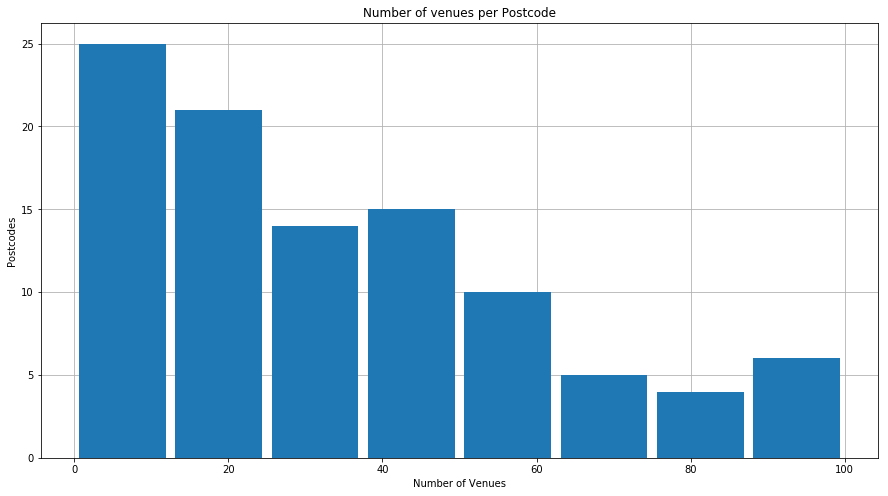

In [196]:
venues_in_postcode['# of Venues'].hist(bins=8, figsize=(15,8),zorder=2, rwidth=0.9)

plt.xlabel('Number of Venues')
plt.ylabel('Postcodes')
plt.title('Number of venues per Postcode')
plt.show()

In [199]:
density_venues_in_postcode = all_venues.groupby('Postcode').count()

density_venues_in_postcode = pd.DataFrame(list(zip(density_venues_in_postcode.index, density_venues_in_postcode['Venue'])), 
                                  columns=['Postcode', 'Density']).set_index('Postcode').join(df_toronto_loc[['Postcode','Distance']].set_index('Postcode'), on='Postcode').reset_index()
density_venues_in_postcode['Density'] = np.int64(density_venues_in_postcode['Density']/(density_venues_in_postcode['Distance']/1000)) #distance in km
density_venues_in_postcode.loc[len(venues_in_postcode.index)] = ['M5E', 0, 111] #add M5E (postcode without venues) with zero as density

density_venues_in_postcode.head(10)

,Postcode,Density,Distance
0,M1B,31,1521.0
1,M1C,3,1296.0
2,M1E,39,1296.0
3,M1G,12,880.0
4,M1H,19,880.0
5,M1J,10,1094.0
6,M1K,23,1127.0
7,M1L,27,1118.0
8,M1M,12,1094.0
9,M1N,15,1356.0


In [201]:
density_venues_in_postcode[['Density']].describe()

,Density
count,100.000000
mean,44.690000
std,40.093753
min,0.000000
25%,16.750000
50%,32.500000
75%,65.000000
max,184.000000


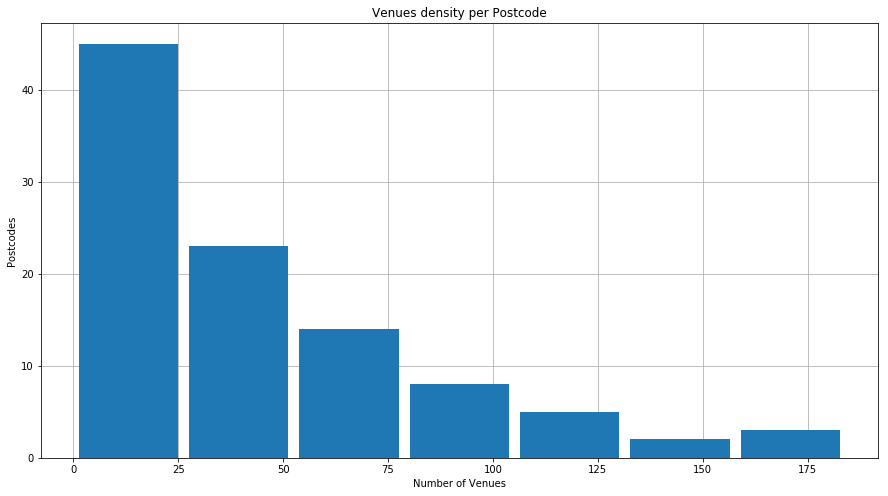

In [203]:
density_venues_in_postcode['Density'].hist(bins=7, figsize=(15,8),zorder=2, rwidth=0.9)

plt.xlabel('Number of Venues')
plt.ylabel('Postcodes')
plt.title('Venues density per Postcode')
plt.show()

In [204]:
from sklearn import metrics

In [205]:
from scipy.spatial.distance import cdist

In [211]:
from sklearn.cluster import KMeans

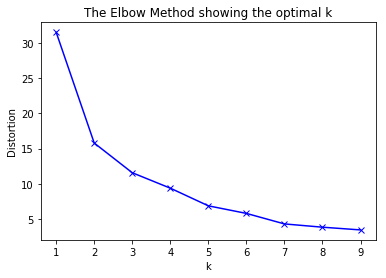

In [212]:
distortions = []
K = range(1,10)
for k in K:
    k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
    k_means.fit(density_venues_in_postcode['Density'].values.reshape(-1, 1))
    distortions.append(sum(np.min(cdist(density_venues_in_postcode['Density'].values.reshape(-1, 1),
                                        k_means.cluster_centers_, 'euclidean'), axis=1)) / density_venues_in_postcode['Density'].shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [213]:
num_clusters = 5

k_means = KMeans(init = "k-means++", n_clusters = num_clusters, n_init = 12)
k_means.fit(density_venues_in_postcode['Density'].values.reshape(-1, 1))
labels = k_means.labels_

print(labels)

[0 4 0 4 4 4 4 0 4 4 0 0 0 0 0 0 4 0 0 4 4 0 1 4 4 4 0 0 0 4 4 4 4 0 4 4 1
 1 1 4 0 3 1 3 4 4 4 1 4 4 4 1 2 1 2 1 0 1 1 4 1 3 0 4 1 1 2 3 1 3 0 4 4 3
 1 3 3 4 4 0 1 1 1 1 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4]


In [214]:
density_venues_in_postcode['Cluster'] = k_means.labels_
density_venues_in_postcode.head(10)

,Postcode,Density,Distance,Cluster
0,M1B,31,1521.0,0
1,M1C,3,1296.0,4
2,M1E,39,1296.0,0
3,M1G,12,880.0,4
4,M1H,19,880.0,4
5,M1J,10,1094.0,4
6,M1K,23,1127.0,4
7,M1L,27,1118.0,0
8,M1M,12,1094.0,4
9,M1N,15,1356.0,4


In [215]:

centroids = np.int64(round(density_venues_in_postcode.groupby('Cluster').mean()['Density']))
frecuency = density_venues_in_postcode.groupby('Cluster').count()['Postcode']

cluster_info = pd.DataFrame([np.arange(0,5), centroids, frecuency], index=['Cluster', 'Centroid','Postcodes']).T
cluster_info.sort_values('Centroid', inplace=True)
cluster_info.reset_index(drop=True, inplace=True)

cluster_info

,Cluster,Centroid,Postcodes
0,4,14,43
1,0,36,26
2,1,74,20
3,3,118,8
4,2,172,3


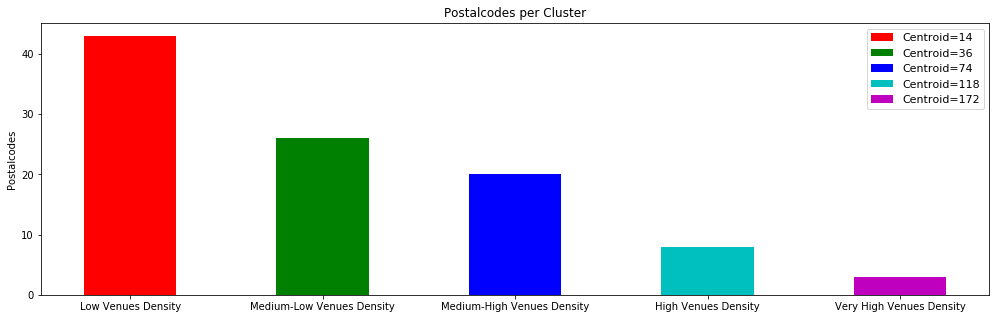

In [216]:
fig, ax = plt.subplots(figsize=(17,5))
clusters= ['Low Venues Density','Medium-Low Venues Density','Medium-High Venues Density','High Venues Density','Very High Venues Density']
colors = ['r','g','b','c','m']
legend = []

for id, cluster in enumerate(clusters):
    legend.append('Centroid={}'.format(cluster_info['Centroid'][id]))
    bar = ax.bar(cluster, cluster_info['Postcodes'][id], 0.48, color=colors[id])

ax.set_ylabel('Postalcodes')
ax.set_title('Postalcodes per Cluster')
# ax.set_facecolor((1,1,1))
# ax.grid(True, axis='y',color='k', linestyle='-', linewidth=1)

plt.legend(legend, fontsize=11)
